In [352]:
import math
import statistics
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

6. Suppose we collect data for a group of students in a statistics class
with variables X1 = hours studied, X2 = undergrad GPA, and Y =
receive an A. We fit a logistic regression and produce estimated
coefficient, $\beta_0 = −6$, $\beta_1 = 0.05$, $\beta_2 = 1.$

(a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.
$$Probability\ of\ Receiving\ an\ A = \frac{e^{-6 + 0.05*Hours\ Studied + Undergrad\ GPA}}{1+e^{-6 + 0.05*Hours\ Studied + Undergrad\ GPA}}$$

In [354]:
math.pow(math.e,-6+0.05*40+3.5)/(1+math.pow(math.e, -6+0.05*40+3.5))

0.37754066879814546

37.75%

(b) How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

$$\frac{1}{2}= \frac{e^{-6 + 0.05X_1 + 3.5}}{1+e^{-6 + 0.05*X_1 + 3.5}}$$

if the fraction is equal to 1/2, it must be the case that $e^{-2.5+0.05X_1} = 1$

$$1=e^{-2.5+0.05X_1}$$
$$0=-2.5+0.05X_1$$
$$X_1=50 hours$$

7. Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was $\bar{X} = 10$, while the mean for those that didn’t was $\bar{X} = 0$. In addition, the variance of X for these two sets of companies was $\hat{\sigma}^2 = 36$. Finally, 80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

Hint: Recall that the density function for a normal random variable is
$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/2\sigma^2}$. You will need to use Bayes’ theorem.

$$p_1(4)=\frac{\frac{0.8}{\sqrt{72\pi}}e^{-(4-10)^2/(72)}}
{\frac{0.2}{\sqrt{72\pi}}e^{-\frac{(4-0)^2}{72}}+
{0.8}{\sqrt{72\pi}}e^{-\frac{(4-10)^2}{72}}}$$

$$p_1(4)=\frac{0.8e^{-1/2}}
{0.2e^{-4/9}+0.8e^{-1/2}}$$

In [355]:
(0.8*math.pow(math.e,(-1/2)))/(0.2*math.pow(math.e,(-4/9))+0.8*math.pow(math.e,(-1/2)))

0.7909628156307615

9. This problem has to do with odds.
(a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?
$$0.37=\frac{Pr(Y=1|X)}{1-Pr(Y=1|X)}$$
$$0.37-0.37Pr(Y=1|X)=Pr(Y=1|X)$$
$$0.37=1.37Pr(Y=1|X)$$
$$Pr(Y=1|X)=0.27$$

(b) Suppose that an individual has a 16 % chance of defaulting on her credit card payment. What are the odds that she will default?
$$Odds = \frac{0.16}{1-.16}=\frac{0.16}{0.84}=19\%$$

11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.
(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [359]:
data = pd.read_csv("Data-Auto.csv")
data = data.drop(["Unnamed: 0", "name"], axis = 1)
data.dropna(inplace=True)

print(data.shape)
data.head()

(392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [360]:
data["mpg01"] = data["mpg"] > data["mpg"].median()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,False
1,15.0,8,350.0,165,3693,11.5,70,1,False
2,18.0,8,318.0,150,3436,11.0,70,1,False
3,16.0,8,304.0,150,3433,12.0,70,1,False
4,17.0,8,302.0,140,3449,10.5,70,1,False


In [361]:
auto = data.drop(["mpg"], axis = 1)
auto.sort_values(by="mpg01", ascending = False).head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
196,4,91.0,53,1795,17.4,76,3,True
293,4,98.0,80,1915,14.4,79,1,True
291,4,89.0,71,1925,14.0,79,2,True
277,4,98.0,68,2135,16.6,78,3,True
276,4,89.0,71,1990,14.9,78,2,True


(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


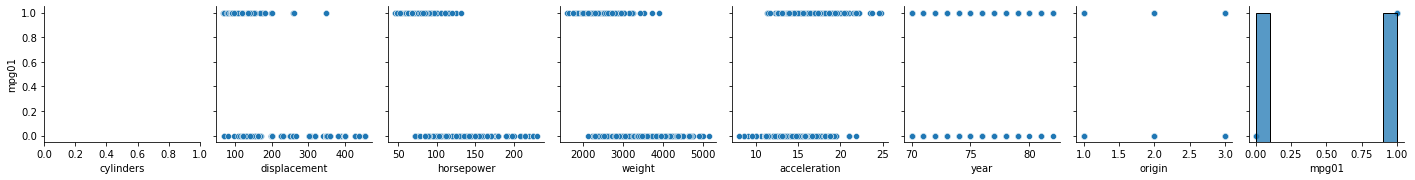

In [362]:
sn.pairplot(auto,y_vars = "mpg01")

The scatterplots suggest that displacement, horsepower, weight, and acceleration could be useful in predicting mpg01. Each shows evidence of a different X distributions based on whether mpg01 is 0 or 1.

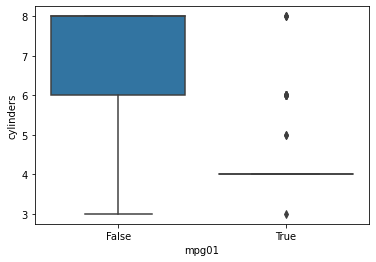

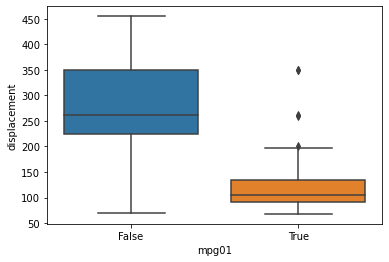

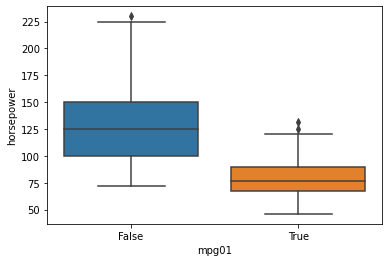

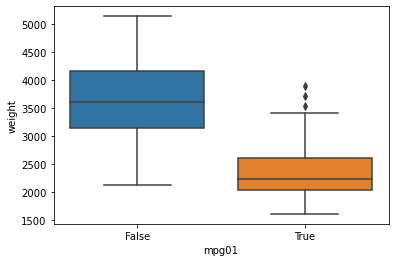

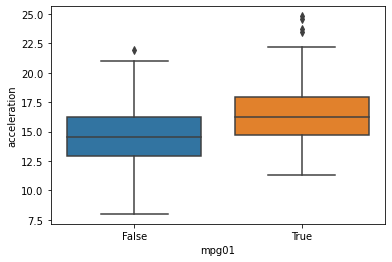

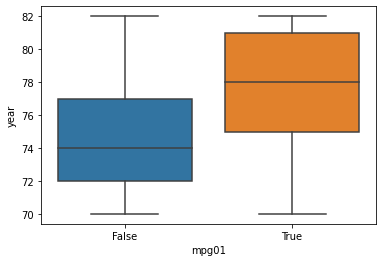

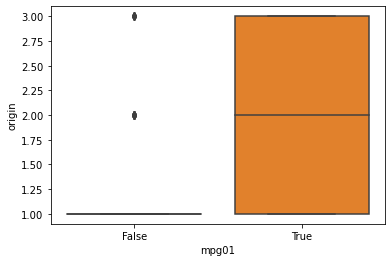

In [363]:
for i in auto.drop(columns=["mpg01"]).columns:
    sn.boxplot(y = auto[i], x = auto["mpg01"])
    plt.show()    

The boxplots give additional information about the categorical X variables, variation that the scatterplots obscured because of the number of overlapping points. We now see that in addition to the X variables identified above, number of cylinders, year, and origin also may be useful in our prediction. The boxplots make it seem like acceleration might be less useful as a predictor than initially thought.

(c) Split the data into a training set and a test set.

In [364]:
X = auto.drop(["mpg01"], axis = 1)
y = auto["mpg01"].astype("category").cat.codes
auto.head()
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1
388,4,97.0,52,2130,24.6,82,2
389,4,135.0,84,2295,11.6,82,1
390,4,120.0,79,2625,18.6,82,1


In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

I chose to maintain all of the X variables because they all seemed predictive of mpg01.

In [366]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_pred = lda_model.predict(X_test)
1-accuracy_score(y_test, y_pred)

0.13559322033898302

The test error is about 13.56%

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [367]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

y_pred = qda_model.predict(X_test)
1-accuracy_score(y_test, y_pred)

0.14406779661016944

The test error is about 14.41%

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [368]:
logit_model = LogisticRegression(max_iter = 1000)
logit_model.fit(X_train, y_train)

y_pred = logit_model.predict(X_test)
1-accuracy_score(y_test,y_pred)

0.1271186440677966

The test error is about 12.71%

5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

(a) Fit a logistic regression model that uses income and balance to predict default.

In [369]:
default = pd.read_csv("Data-Default.csv")
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [370]:
X = default.iloc[:, 3:5 ]
y = default["default"].astype("category").cat.codes

(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ii. Fit a multiple logistic regression model using only the training observations.

In [374]:
logit_model = LogisticRegression(max_iter = 1000)
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

In [375]:
y_pred = logit_model.predict(X_test)

In [376]:
y_posterior = pd.DataFrame(logit_model.predict_proba(X_test))
y_posterior


,0,1
0,0.966443,0.033557
1,0.993580,0.006420
2,0.942672,0.057328
3,0.984591,0.015409
4,0.996856,0.003144
...,...,...
2995,0.996546,0.003454
2996,0.995526,0.004474
2997,0.698734,0.301266
2998,0.989018,0.010982


iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [377]:
1 - accuracy_score(y_test,y_pred)

0.03166666666666662

The validation set error is about 3.12%

(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [381]:
for i, seed in enumerate([16, 78, 244]):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=seed)
    logit_model = LogisticRegression(max_iter = 1000)
    logit_model.fit(X_train, y_train)
    y_pred = logit_model.predict(X_val)
    validation_set_error = 1 - accuracy_score(y_val, y_pred)
    
    print("Validation set error with set", i+1 ," is: " , validation_set_error)
    

Validation set error with set 1  is:  0.030333333333333323
Validation set error with set 2  is:  0.02833333333333332
Validation set error with set 3  is:  0.03433333333333333


The error rate is quite low, ranging from 0.023-0.034. Since it has been relatively low-variance over the 4 splits, I think the model is performing well and not overfitting to the training set.

(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [379]:
X = default.iloc[:, 2:5]
y = default["default"].astype("category").cat.codes
X["student"] = X["student"].astype("category").cat.codes

In [380]:
for i, seed in enumerate([16, 78, 244]):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=seed)
    logit_model = LogisticRegression(max_iter = 1000)
    logit_model.fit(X_train, y_train)
    y_pred = logit_model.predict(X_val)
    validation_set_error = 1 - accuracy_score(y_val, y_pred)
    
    print("Validation set error with set", i+1 ," is: " , validation_set_error)

Validation set error with set 1  is:  0.03300000000000003
Validation set error with set 2  is:  0.02533333333333332
Validation set error with set 3  is:  0.028666666666666618


Including student status did not lead to a clear change in the error rate. When we included student status as a predictor, the error rate ranged from 2.53% to 3.3%, which is very similar to how the model performed without that predictor. However, it is difficult to draw firm conclusions on the basis of just a few simulations.